In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('games.csv')
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
# The first thing which i can see here is that id and name of the game are not at all importatnt for predicting the average rating of game.
# So we can directly delete them from our dataset
df.drop(['id','name'],axis=1,inplace=True)
df.head()

,type,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,boardgame,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,boardgame,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,boardgame,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,boardgame,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,boardgame,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [5]:
df['type'].unique()

array(['boardgame', 'boardgameexpansion'], dtype=object)

In [8]:
df['type'] = df['type'].map({'boardgame' : 1,'boardgameexpansion' : 2})
df.head()

,type,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,1,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,1,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,1,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,1,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


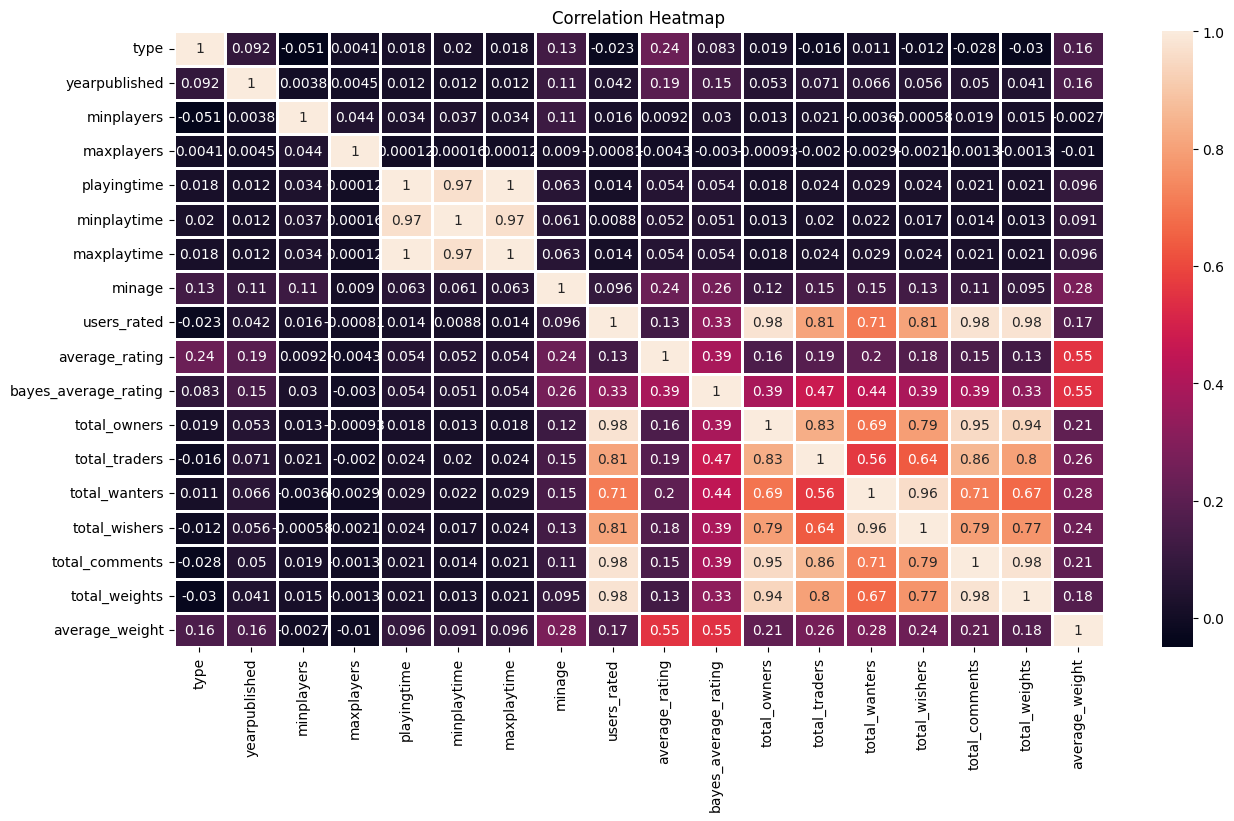

In [15]:
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.heatmap(df.corr(), annot=True, linewidths=1.0)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# minplaytime, maxplaytime, total_owners, total_consumers, total_weights
df.drop(['minplaytime','maxplaytime','total_owners','total_comments','total_weights'],axis=1,inplace=True)
df.head()

,type,yearpublished,minplayers,maxplayers,playingtime,minage,users_rated,average_rating,bayes_average_rating,total_traders,total_wanters,total_wishers,average_weight
0,1,2005.0,2.0,2.0,180.0,13.0,20113,8.33774,8.22186,372,1219,5865,3.4785
1,1,2012.0,2.0,5.0,150.0,12.0,14383,8.28798,8.14232,132,1586,6277,3.8939
2,1,2013.0,1.0,7.0,210.0,12.0,9262,8.28994,8.06886,99,1476,5600,3.7761
3,1,2006.0,2.0,4.0,240.0,12.0,13294,8.20407,8.05804,362,1084,5075,4.1590
4,1,2002.0,2.0,5.0,150.0,12.0,39883,8.14261,8.04524,795,861,5414,3.2943


In [22]:
df.to_csv('E:/My ML Projects/Board Game Review Prediction Modular/modified_games.csv')